First, I am going to load in the Penguin Data and take a look at the data we are given.

In [103]:
import pandas as pd

train_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)
train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0809,31,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N63A1,Yes,11/24/08,40.9,16.6,187.0,3200.0,FEMALE,9.08458,-24.54903,NaN
1,PAL0809,41,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N74A1,Yes,11/24/08,49.0,19.5,210.0,3950.0,MALE,9.53262,-24.66867,NaN
2,PAL0708,4,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N32A2,Yes,11/27/07,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
3,PAL0708,15,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,Yes,12/3/07,45.8,14.6,210.0,4200.0,FEMALE,7.79958,-25.62618,NaN
4,PAL0809,34,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N65A2,Yes,11/24/08,51.0,18.8,203.0,4100.0,MALE,9.23196,-24.17282,NaN


Now, I'll use the code that was provided to one-hot ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍encode the categorical features. I've also decided to remove rows the have N/A because we haven't learned how to impude the missing values yet. 

In [104]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)

y_train


array([1, 1, 2, 2, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 0,
       0, 2, 2, 1, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 0, 2, 2, 1, 2, 2,
       2, 0, 2, 0, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 0, 0, 1, 2, 2, 1, 0,
       2, 0, 1, 2, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 0, 2, 0, 2, 0, 1, 0, 0,
       0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 1, 0, 0, 0, 1, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 1, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 1, 0, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1])

In [105]:
X_train.to_csv("X_Train.csv", index = False)

pd.DataFrame(y_train, columns=["Species"]).to_csv("y_train.csv", index=False)

Now, I am going to merge the column with the species onto my new dataset.

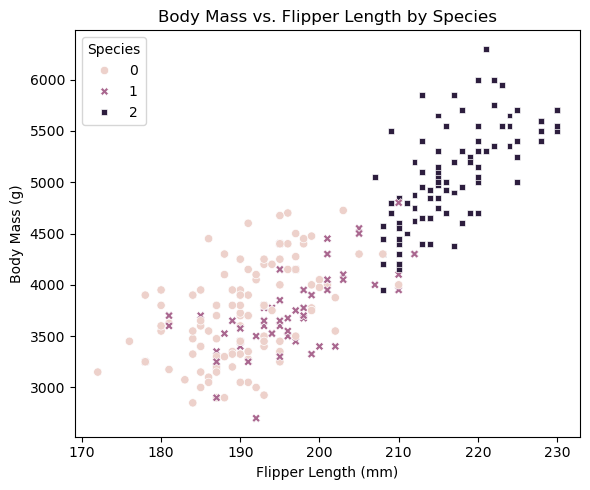

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = X_train.copy()
df["Species"] = y_train.flatten().astype(int)


fig, ax = plt.subplots(figsize=(6, 5))
sns.scatterplot(data=df, x="Flipper Length (mm)", y="Body Mass (g)", hue="Species", style="Species", ax=ax)
ax.set(title="Body Mass vs. Flipper Length by Species", xlabel="Flipper Length (mm)", ylabel="Body Mass (g)")
plt.tight_layout()
plt.show()

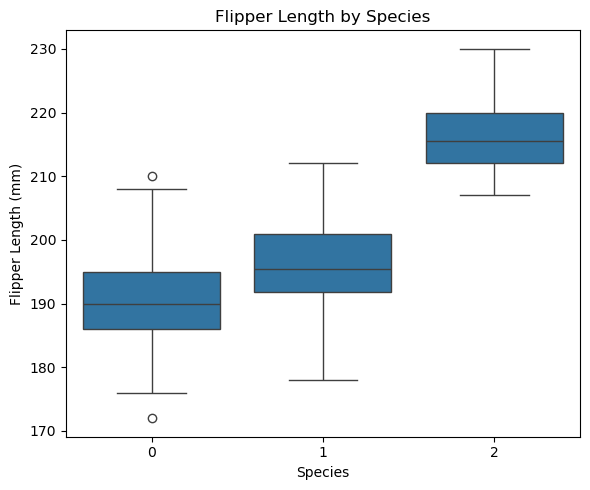

In [107]:
# Boxplot: Flipper Length Distribution (with hue)
fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(data=df, x="Species", y="Flipper Length (mm)", ax=ax)
ax.set(title="Flipper Length by Species", xlabel="Species", ylabel="Flipper Length (mm)")
plt.tight_layout()
plt.show()

In [108]:
summary_table = df.groupby("Species").aggregate({
    "Culmen Length (mm)": ["mean", "std"],
    "Culmen Depth (mm)": ["mean", "std"],
    "Flipper Length (mm)": ["mean", "std"],
    "Body Mass (g)": ["mean", "std"]
})
summary_table

Culmen Length (mm)           Culmen Depth (mm)            \
                      mean       std              mean       std   
Species                                                            
0                38.961111  2.685713         18.380556  1.218430   
1                48.771429  3.456257         18.346429  1.137935   
2                47.133696  2.783242         14.926087  1.016336   

        Flipper Length (mm)           Body Mass (g)              
                       mean       std          mean         std  
Species                                                          
0                190.527778  6.652184   3722.916667  462.850335  
1                195.821429  7.366033   3739.732143  410.148997  
2                216.739130  6.061715   5057.336957  498.976123

In [109]:
X_train

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,40.9,16.6,187.0,3200.0,9.08458,-24.54903,False,True,False,True,False,True,True,False
1,49.0,19.5,210.0,3950.0,9.53262,-24.66867,False,True,False,True,False,True,False,True
2,50.0,15.2,218.0,5700.0,8.25540,-25.40075,True,False,False,True,False,True,False,True
3,45.8,14.6,210.0,4200.0,7.79958,-25.62618,True,False,False,True,False,True,True,False
4,51.0,18.8,203.0,4100.0,9.23196,-24.17282,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,51.1,16.5,225.0,5250.0,8.20660,-26.36863,True,False,False,True,False,True,False,True
271,35.9,16.6,190.0,3050.0,8.47781,-26.07821,False,False,True,True,True,False,True,False
272,39.5,17.8,188.0,3300.0,9.66523,-25.06020,False,True,False,True,False,True,True,False
273,36.7,19.3,193.0,3450.0,8.76651,-25.32426,False,False,True,True,False,True,True,False


In [110]:
# Re-import necessary libraries after execution state reset
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


qualitative_features = ["Island_Biscoe", "Island_Dream", "Island_Torgersen", "Clutch Completion_No", "Clutch Completion_Yes", "Sex_FEMALE", "Sex_MALE"]
quantitative_features = ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)"]

# Initialize variables
best_features = None
best_score = 0

# Try combinations of 1 qualitative + 2 quantitative features
for qual in qualitative_features:
    for quant_combo in combinations(quantitative_features, 2):
        selected_features = [qual] + list(quant_combo)

        # Train a Random Forest (instead of Decision Tree) with optimized hyperparameters
        RF = RandomForestClassifier(random_state=7)
        scores = cross_val_score(RF, X_train[selected_features], y_train, cv=5)

        # Compute mean accuracy
        mean_score = np.mean(scores)

        # Track the best feature combination
        if mean_score > best_score:
            best_score = mean_score
            best_features = selected_features

# Output the best feature set and corresponding accuracy
best_features, best_score


(['Sex_MALE', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
 np.float64(0.9844645550527904))

In [ ]:
test_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)

X_test, y_test = prepare_data(test)
cols = ['Culmen Length (mm)', 'Flipper Length (mm)','Sex_MALE']

RF = RandomForestClassifier(random_state=7)
RF.fit(X_test[cols], y_test)
RF.score(X_test[cols], y_test)


1.0

In [121]:
X_train

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,40.9,16.6,187.0,3200.0,9.08458,-24.54903,False,True,False,True,False,True,True,False
1,49.0,19.5,210.0,3950.0,9.53262,-24.66867,False,True,False,True,False,True,False,True
2,50.0,15.2,218.0,5700.0,8.25540,-25.40075,True,False,False,True,False,True,False,True
3,45.8,14.6,210.0,4200.0,7.79958,-25.62618,True,False,False,True,False,True,True,False
4,51.0,18.8,203.0,4100.0,9.23196,-24.17282,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,51.1,16.5,225.0,5250.0,8.20660,-26.36863,True,False,False,True,False,True,False,True
271,35.9,16.6,190.0,3050.0,8.47781,-26.07821,False,False,True,True,True,False,True,False
272,39.5,17.8,188.0,3300.0,9.66523,-25.06020,False,True,False,True,False,True,True,False
273,36.7,19.3,193.0,3450.0,8.76651,-25.32426,False,False,True,True,False,True,True,False


Now regions...

In [131]:
from matplotlib.patches import Patch
from matplotlib import pyplot as plt
import numpy as np

def plot_regions(model, X, y):
    
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    qual_features = X.columns[2:]
    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
      XY = pd.DataFrame({
          X.columns[0] : XX,
          X.columns[1] : YY
      })

      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[0], 
            ylabel  = X.columns[1], 
            title = qual_features[i])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))

      plt.legend(title = "Species", handles = patches, loc = "best")
      
      plt.tight_layout()


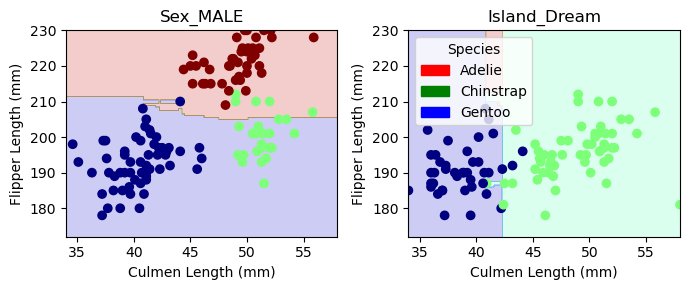

In [133]:
cols = ['Culmen Length (mm)', 'Flipper Length (mm)','Sex_MALE', "Island_Dream"]
RF = RandomForestClassifier()
RF.fit(X_train[cols], y_train)

plot_regions(RF, X_train[cols], y_train)

JACKSON HANSONThis is an example of the blog posts that you'll submit as your primary form of learning demonstration in CSCI 0451. I created this post by modifying the file `posts/example-blog-post/index.ipynb` in VSCode. You can also use JupyterLab for this editing if you prefer. Finally, it is possible to write blog posts without using notebooks by writing `.qmd` files, as illustrated [here](https://quarto.org/docs/get-started/hello/vscode.html). 

# Frontmatter

Your notebook needs to contain some metadata: things like the title, author, date, etc. You specify this in a `raw` cell at the very beginning of the notebook. In this notebook, the contents of this cell is: 

```
---
title: Hello Blog
author: Phil Chodrow
date: '2023-01-10'
image: "image.jpg"
description: "An example blog post illustrating the key techniques you'll need to demonstrate your learning in CSCI 0451."
format: html
---
```

Frontmatter can be fiddly (it's sensitive to spaces, for example), and so the best approach is usually to copy and paste it from previous blog posts, modifying it as appropriate. 


# Running Python Code

To run Python code, place your code in a Python code block inside your notebook. You can run the code block inside VSCode (or JupyterLab) using the keyboard shortcut `ctrl + Enter`. You'll see the result of your computation below the code, including the value of the most recent statement. 

'CSCI 0451'

In [79]:
import numpy as np

NUM_CASES  = 1000
PREVALENCE = 0.1
NOISE      = 2
k = 25

cases  = 1*(np.random.rand(NUM_CASES) < PREVALENCE)
scores = np.exp(cases + NOISE*(np.random.rand(NUM_CASES))) / np.exp(NOISE+1)

In [41]:
def compute_total_cost(t, k=10):
    predicted_positive = scores > t
    false_positives = np.sum((predicted_positive == 1) & (cases == 0))  # Scenario (a)
    false_negatives = np.sum((predicted_positive == 0) & (cases == 1))  # Scenario (b)
    
    return false_positives * 1 + false_negatives * k

# Search for optimal t using a simple for-loop
t_values = np.linspace(0, 1, 100)  # Explore 100 possible thresholds
best_t = t_values[0]  # Start with the first threshold

for t in t_values:
    if compute_total_cost(t, k) < compute_total_cost(best_t, k):
        best_t = t

# Output the optimal threshold
best_t

np.float64(0.13131313131313133)

We'll have lots of opportunities to make data visualizations in this course. These also display inside the notebook, and get converted into your blog post: 

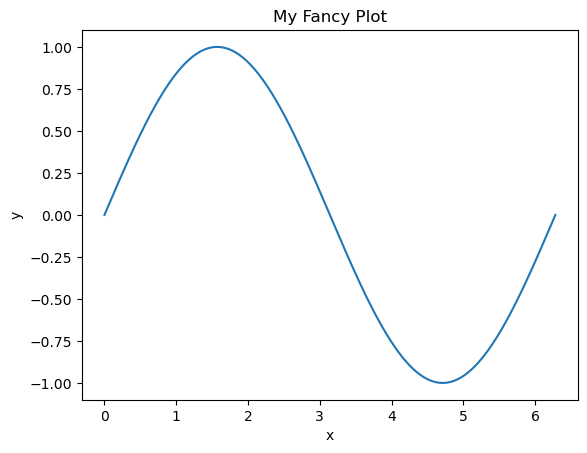

In [2]:
from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(0, 2*np.pi, 1001)
y = np.sin(x)
fig = plt.plot(x, y)
xlab = plt.xlabel("x")
ylab = plt.ylabel("y")
title = plt.gca().set(title = "My Fancy Plot")

Another thing we'll often do is implement an algorithm in a source file (i.e. a `.py` file) and then *use* it in a notebook. To do this, just place the `.py` file in the same directory as the notebook. For example, the file `source.py` in the same directory contains a custom function (which prints a message). I can use like this: 

In [1]:
import source 
source.my_custom_function()

I implemented this function in the file source.py


# Markdown

You can use Markdown syntax to write text in Markdown cells. Markdown allows you to create simple text formatting like bullets, italics, and section headers. The Quarto [description of markdown basics](https://quarto.org/docs/authoring/markdown-basics.html) has everything you need to get started. 

## Math

In addition to regular text using the Markdown specification, you can also write mathematics, enclosed between dollar signs. The syntax for writing math is very similar to the syntax used in the $\LaTeX$ markup language. For example, `$f(x) \approx y$` renders to $f(x) \approx y$. To place complex mathematical expressions on their own lines, use double dollar signs. For example, the expression 

`$$\mathcal{L}(a, b) = \sum_{i = 1}^n (ax_i + b - y_i)^2$$` 

renders to: 

$$\mathcal{L}(a, b) = \sum_{i = 1}^n (ax_i + b - y_i)^2\;.$$

Behind the scenes, math is powered by the MathJax engine. For more on how to write math, check this handy [tutorial and quick reference](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference). 